In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from datasets import load_dataset

dataset1 = load_dataset('lukebarousse/data_jobs')
df0 = dataset1['train'].to_pandas()
df= df0.copy()
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\AB\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\AB\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Mon Nov 25 20:02:42 2024).


In [3]:
df['job_posted_day'] = df['job_posted_date'].dt.strftime('%A')

In [4]:
df['job_posted_month'] = df['job_posted_date'].dt.strftime('%B')

In [5]:
df[['job_posted_day']]

,job_posted_day
0,Friday
1,Saturday
2,Tuesday
3,Tuesday
4,Monday
...,...
785736,Monday
785737,Sunday
785738,Sunday
785739,Sunday


In [6]:
job_loc = df['job_country'].value_counts()
job_loca = job_loc.head(6).index.to_list()
job_loca

['United States', 'India', 'United Kingdom', 'France', 'Germany', 'Spain']

In [7]:
df_pivot = df.pivot_table(index='job_posted_month',columns='job_title_short',aggfunc='size')

In [8]:
df_pivot.reset_index(inplace=True)
df_pivot['month_no'] = pd.to_datetime(df_pivot['job_posted_month'],format='%B').dt.month
df_pivot.sort_values('month_no',inplace=True)
df_pivot.set_index('job_posted_month',inplace=True)
df_pivot.drop(columns='month_no',inplace=True)

In [9]:
df_pivot

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_posted_month,,,,,,,,,,
January,4874,1295,23585,21419,20760,1386,3696,5041,4644,5122
February,3454,843,16558,15899,13951,1046,2713,3756,2994,3364
March,3393,883,16243,16093,13569,1065,2454,3705,2987,3692
April,4246,1051,15514,14891,13513,990,2351,3572,2766,4025
May,2408,480,13423,13646,11745,811,1925,3298,2399,1969
June,3413,714,16008,15501,13615,1048,2319,3809,2932,2213
July,3850,1059,16095,14518,14177,1174,2380,3744,3117,3663
August,5189,1378,18628,15622,16984,1360,2951,4025,4055,4970
September,4447,1022,14969,14918,13577,1250,2194,3547,2936,3499


In [10]:
data_job_list = ['Data Analyst', 'Data Scientist', 'Data Engineer']

(0.0, 25000.0)

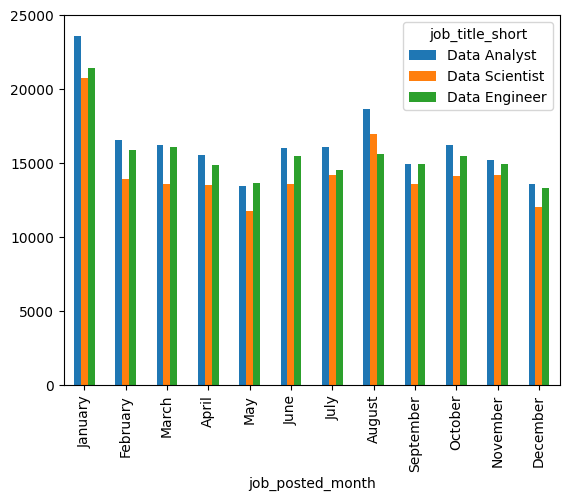

In [11]:
df_pivot[data_job_list].plot(kind='bar')
plt.ylim(0,25000)

In [12]:
df_pivot2 = df.pivot_table(index='job_country',columns='job_title_short',aggfunc='size')
df_pivot2

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_country,,,,,,,,,,
Afghanistan,4.0,NaN,9.0,NaN,1.0,NaN,2.0,NaN,NaN,NaN
Albania,11.0,1.0,36.0,30.0,12.0,4.0,2.0,6.0,11.0,6.0
Algeria,21.0,5.0,22.0,21.0,27.0,2.0,NaN,1.0,NaN,12.0
Angola,1.0,NaN,2.0,3.0,1.0,NaN,NaN,NaN,1.0,3.0
Argentina,453.0,322.0,1273.0,2265.0,1617.0,287.0,255.0,647.0,350.0,1267.0
...,...,...,...,...,...,...,...,...,...,...
Venezuela,2.0,2.0,16.0,19.0,9.0,4.0,4.0,4.0,3.0,6.0
Vietnam,91.0,70.0,334.0,768.0,375.0,115.0,71.0,220.0,91.0,279.0
Yemen,3.0,NaN,4.0,2.0,NaN,NaN,NaN,NaN,NaN,1.0


<Axes: ylabel='job_country'>

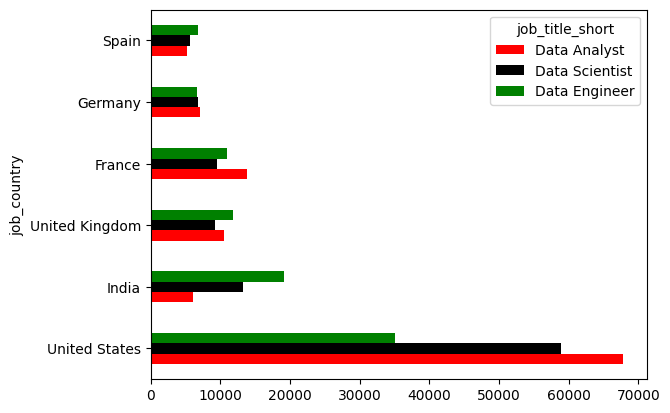

In [17]:
df_pivot2[data_job_list].loc[job_loca].plot(kind='barh',color=['red','black','green'])